# Class 05: Data Cleaning & Exploratory Data Analysis (EDA)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Part 1: Data Cleaning

---

In [3]:
tech_data_path = "tech_employee_survey.csv"

## Loading & First Look

In [3]:
# df = pd.read_excel('input/data.xlsx')
# df = pd.read_json('input/data.json')

In [4]:
df=pd.read_csv(tech_data_path )
print(f"shape: {df.shape}") # rows, columns

shape: (30, 10)


In [5]:
df.head()

,Employee_ID,Name,Age,Department,Salary,Years_Experience,Performance_Score,City,Join_Date,Remote_Work
0,1001,John Doe,28,Engineering,75000,3.0,4.0,Dhaka,2020-01-15,Yes
1,1002,ALICE SMITH,32,hr,85000,5.0,5.0,dhaka,15/01/2019,yes
2,1003,Bob Jones,-5,engineering,50000,2.0,8.0,Dhaka,Jan 15 2021,Y
3,1001,John Doe,28,Engineering,75000,3.0,4.0,Dhaka,2020-01-15,Yes
4,1004,Sarah Smith,thirty,HR Department,$120000,7.0,4.0,DHAKA,2021-03-10,True


In [6]:
df['Join_Date'].head(4)

0     2020-01-15
1     15/01/2019
2    Jan 15 2021
3     2020-01-15
Name: Join_Date, dtype: object

In [7]:
df[["City","Remote_Work"]].head(4)

,City,Remote_Work
0,Dhaka,Yes
1,dhaka,yes
2,Dhaka,Y
3,Dhaka,Yes


In [8]:
df.tail(3)

,Employee_ID,Name,Age,Department,Salary,Years_Experience,Performance_Score,City,Join_Date,Remote_Work
27,1026,Nancy Martinez,29,hr,73000,5.0,5.0,Dhaka,2021-04-22,No
28,1027,Christopher Lee,33,Engineering,84000,7.0,0.0,DHAKA,2019-07-08,YES
29,1007,Tom Brown,29,NaN,65000,-2.0,5.0,dhaka,2022-01-01,Maybe


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        30 non-null     int64  
 1   Name               30 non-null     object 
 2   Age                30 non-null     object 
 3   Department         27 non-null     object 
 4   Salary             29 non-null     object 
 5   Years_Experience   29 non-null     float64
 6   Performance_Score  29 non-null     float64
 7   City               30 non-null     object 
 8   Join_Date          30 non-null     object 
 9   Remote_Work        30 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ KB


In [11]:
df.describe()

,Employee_ID,Years_Experience,Performance_Score
count,30.000000,29.000000,29.000000
mean,1011.633333,8.724138,4.310345
std,7.993460,10.056613,1.983926
min,1001.000000,-2.000000,0.000000
25%,1005.000000,4.000000,4.000000
50%,1010.500000,6.000000,4.000000
75%,1017.750000,10.000000,5.000000
max,1027.000000,50.000000,10.000000


In [12]:
df.dtypes #dtypes -> data types of each column

Employee_ID            int64
Name                  object
Age                   object
Department            object
Salary                object
Years_Experience     float64
Performance_Score    float64
City                  object
Join_Date             object
Remote_Work           object
dtype: object

### Discussion Questions

1. Columns with whitespace issues
2. Incorrect data types
3. Suspicious or impossible values
4. Inconsistencies in categorical data

---

## Removing Duplicates

In [13]:
df.duplicated()

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27    False
28    False
29     True
dtype: bool

In [14]:
print(df.duplicated().sum())

5


In [15]:
~df.duplicated() #~ this symbol means NOT and it will change True to False and False to True

0      True
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
29    False
dtype: bool

In [ ]:
duplicates = df[df.duplicated()] # Only keep rows that are True
duplicates.shape # (number of duplicate rows, number of columns)
# We can also check for duplicates based on specific columns. For example, if we want to check for duplicates based on the 'Employee_ID' column:
# duplicates_by_id = df[df.duplicated(subset=['Employee_ID'])] #subset parameter allows us to specify which columns to consider when identifying duplicates
# duplicates_by_id.shape # (number of duplicate rows based on Employee_ID, number of columns)

(5, 10)

In [18]:
only_unique = df[~df.duplicated()]
only_unique.shape

(25, 10)

In [19]:
df = df.drop_duplicates() # Remove duplicates (keep first occurrence)

In [20]:
print(f"Total rows after removing duplicates: {len(df)}")
print(f"Duplicates remaining: {df.duplicated().sum()}")

Total rows after removing duplicates: 25
Duplicates remaining: 0


---

In [22]:
df.head()

,Employee_ID,Name,Age,Department,Salary,Years_Experience,Performance_Score,City,Join_Date,Remote_Work
0,1001,John Doe,28,Engineering,75000,3.0,4.0,Dhaka,2020-01-15,Yes
1,1002,ALICE SMITH,32,hr,85000,5.0,5.0,dhaka,15/01/2019,yes
2,1003,Bob Jones,-5,engineering,50000,2.0,8.0,Dhaka,Jan 15 2021,Y
4,1004,Sarah Smith,thirty,HR Department,$120000,7.0,4.0,DHAKA,2021-03-10,True
5,1005,Mike Wilson,45,Engineering,1000000000,25.0,3.0,Chittagong,2018-07-20,1


## Data Type Conversion

In [23]:
df.dtypes

Employee_ID            int64
Name                  object
Age                   object
Department            object
Salary                object
Years_Experience     float64
Performance_Score    float64
City                  object
Join_Date             object
Remote_Work           object
dtype: object

### Fix Age column

In [24]:
unique_ages = df['Age'].unique() #unique values apply to a single column
print(len(unique_ages))

19


In [25]:
unique_ages[:10]

array(['28', '32', '-5', 'thirty', '45', '150', '29', '26', '35', '42'],
      dtype=object)

In [26]:
# # pd.to_numeric(df['Age']) # error
# pd.to_numeric(df['age'], errors='coerce') #error because in age coloumn there is string value like 'twenty five' and pd.to_numeric cannot convert string to number now we will use errors='coerce' parameter to handle such cases and convert it to NaN
pd.to_numeric(df['Age'], errors='coerce')

0      28.0
1      32.0
2      -5.0
4       NaN
5      45.0
6     150.0
7      29.0
8      26.0
9      35.0
10     42.0
12      NaN
13     38.0
14     29.0
15     31.0
16     44.0
17     27.0
19     36.0
20     33.0
21     29.0
22     40.0
23     28.0
24     35.0
25     37.0
27     29.0
28     33.0
Name: Age, dtype: float64

In [30]:
# Garbage Detector - identify rows where 'Age' cannot be converted to numeric
condition = pd.to_numeric(df['Age'], errors='coerce').isna() & df['Age'].notna()
 #isna() returns True if the value is missing notna() returns True if the value is not missing
print(df[condition][['Employee_ID', 'Age']])

Empty DataFrame
Columns: [Employee_ID, Age]
Index: []


In [32]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [33]:
print(df['Age'].dtype)

float64


In [37]:
print(df['Age'].isnull().sum()) #isnull() returns True if the value is missing
print(df['Age'].isna().sum())
df["Age"].notna()#rcatches everything except missing

# # Fill missing Age values with the mean age
# mean_age = df['Age'].mean()
# df['Age'] = df['Age'].fillna(mean_age)

# # Verify no missing values remain
# print(df['Age'].isnull().sum())

# #fill missing Age values with manual value
# # df.loc[df["Employee_ID"]==1050, "Age"] = 30
# # print(df.loc[df["Employee_ID"]==1050, "Age"])
# pd.to_numeric(df['Age'], errors='coerce')

2
2


0      True
1      True
2      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
12    False
13     True
14     True
15     True
16     True
17     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
27     True
28     True
Name: Age, dtype: bool

### Fix Salary column

In [39]:
print(df['Salary'].head(10))

0          75000
1          85000
2          50000
4        $120000
5     1000000000
6            NaN
7          65000
8          70000
9          90000
10         95000
Name: Salary, dtype: object


In [42]:
df['Salary'] = df['Salary'].astype(str).str.replace('$', '')

In [44]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

In [45]:
print(df['Salary'].dtype)

float64


In [ ]:
# df['Salary'] = df['Salary'].astype('int64')

In [46]:
print(f"Missing values in Salary: {df['Salary'].isnull().sum()}")

Missing values in Salary: 1


In [47]:
df['Salary'] = df['Salary'].astype('Int64') # Int64 - can hold NaN

In [48]:
df["Salary"]

0          75000
1          85000
2          50000
4         120000
5     1000000000
6           <NA>
7          65000
8          70000
9          90000
10         95000
12         60000
13         88000
14         72000
15         78000
16        110000
17         67000
19            10
20         82000
21         76000
22         92000
23         74000
24         86000
25         50000
27         73000
28         84000
Name: Salary, dtype: Int64

### Fix Date column

In [49]:
df['Join_Date'].head(4)

0     2020-01-15
1     15/01/2019
2    Jan 15 2021
4     2021-03-10
Name: Join_Date, dtype: object

In [50]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'], errors='coerce', format='mixed')

In [51]:
print(df['Join_Date'].head(4))

0   2020-01-15
1   2019-01-15
2   2021-01-15
4   2021-03-10
Name: Join_Date, dtype: datetime64[ns]


## Fix Remote Work

In [52]:
unique_values = df['Remote_Work'].unique()
print(unique_values)

['Yes' 'yes' 'Y' 'True' '1' 'Maybe' 'No' 'no' 'N' 'False' '0' 'TRUE' 'y'
 'YES']


In [56]:
def standardize_boolean(value):
    value = str(value).lower()

    if value in ['yes', 'y', 'true', '1']:
        return True
    elif value in ['no', 'n', 'false', '0']:
        return False
    else:
        return np.nan # Return NaN for invalid values and nan in np is used to represent missing values and it's built in function in numpy

In [58]:
df['Remote_Work'] = df['Remote_Work'].apply(standardize_boolean)

In [59]:
print(df.dtypes)

Employee_ID                   int64
Name                         object
Age                         float64
Department                   object
Salary                        Int64
Years_Experience            float64
Performance_Score           float64
City                         object
Join_Date            datetime64[ns]
Remote_Work                  object
dtype: object


In [60]:
df["Remote_Work"].head(10)

0      True
1      True
2      True
4      True
5      True
6      True
7       NaN
8     False
9     False
10    False
Name: Remote_Work, dtype: object

---

## Text Cleaning

Clean text data by removing whitespace and standardizing case.

### Remove whitespace from Name

In [61]:
for name in df['Name'].head(10):
    print(f"'{name}'")

'  John Doe  '
'ALICE SMITH'
'Bob Jones'
'Sarah Smith'
'Mike Wilson'
'Emma Davis'
'  Tom Brown'
'Lisa Anderson'
'David Lee'
'Maria Garcia'


In [ ]:
# df['Name'].strip()

In [62]:
df['Name'] = df['Name'].str.strip()

In [64]:
for name in df['Name'].head(10):
    print(f"'{name}'")

'John Doe'
'ALICE SMITH'
'Bob Jones'
'Sarah Smith'
'Mike Wilson'
'Emma Davis'
'Tom Brown'
'Lisa Anderson'
'David Lee'
'Maria Garcia'


### Standardize Department names

In [65]:
print(df['Department'].unique())
print(df['Department'].value_counts())

['Engineering' 'hr' 'engineering' 'HR Department' nan 'HR']
Department
Engineering      9
hr               5
engineering      3
HR Department    3
HR               3
Name: count, dtype: int64


In [5]:
df['Department'] = df['Department'].str.lower().str.strip()

department_mapping = {
    'engineering': 'Engineering',
    'hr': 'HR',
    'hr department': 'HR'
}

df['Department'] = df['Department'].replace(department_mapping)

In [6]:
print(df['Department'].value_counts())

Department
Engineering    15
HR             12
Name: count, dtype: int64


### Standardize City names

In [68]:
print(df['City'].unique())
print(df['City'].value_counts())

['Dhaka' 'dhaka' 'DHAKA' 'Chittagong' 'Sylhet']
City
Dhaka         7
DHAKA         5
Sylhet        5
dhaka         4
Chittagong    4
Name: count, dtype: int64


In [69]:
df['City'] = df['City'].str.lower().str.capitalize()

print(df['City'].value_counts())

City
Dhaka         16
Sylhet         5
Chittagong     4
Name: count, dtype: int64


---

## Outlier Detection & Handling

Outliers can significantly impact our analysis.

In [70]:
df['Age'].describe()

count     23.000000
mean      37.000000
std       26.476405
min       -5.000000
25%       29.000000
50%       33.000000
75%       37.500000
max      150.000000
Name: Age, dtype: float64

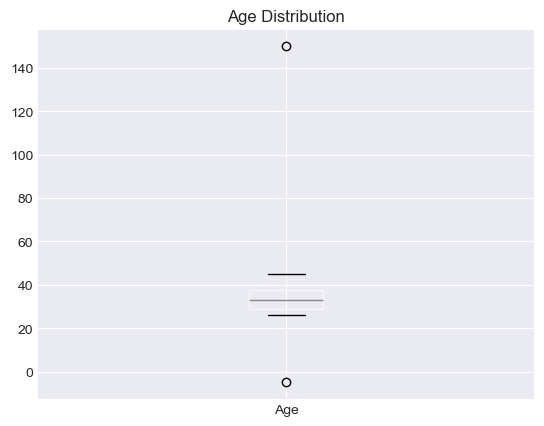

In [71]:
df.boxplot(column='Age')
plt.title('Age Distribution')
plt.show()

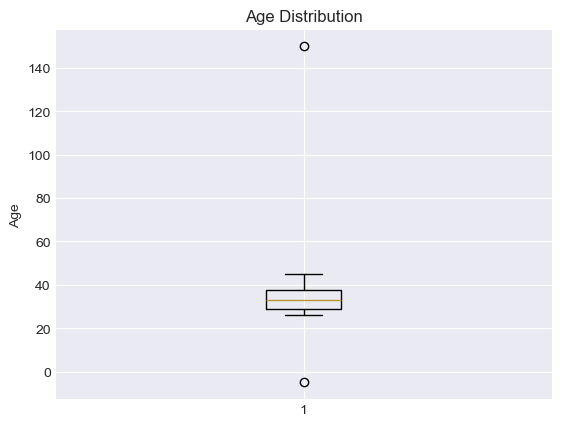

In [ ]:
plt.boxplot(df['Age'].dropna()) #dropna() = Removes missing (NaN) values from data.
plt.title('Age Distribution')
plt.ylabel('Age')
plt.show()

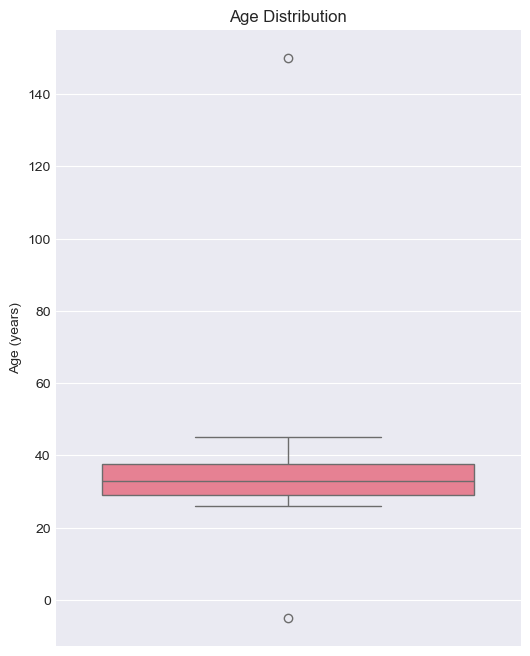

In [85]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['Age']) #sns → Seaborn (statistical plotting library)
# plt.boxplot(df["Age"].dropna())
plt.title('Age Distribution')
plt.ylabel('Age (years)')
plt.show()

**The box (Q1 to Q3):**
- Bottom of box: 29 years (25% of employees are younger)
- Line inside box: 33 years (median - the middle value)
- Top of box: 37.5 years (75% of employees are younger)
- The box shows where most employees' ages fall

**The whiskers (lines outside box):**
- Extend to show the normal range of data
- Everything between whiskers is considered normal

**The circles (outliers):**
- Age 150: Impossible - data entry error
- Age -5: Impossible - negative age


Most employees are between 29-37 years old, but we have two impossible values that need to be removed before analysis.

In [86]:
df['Salary'].describe()

count                24.0
mean      41739250.416667
std      204108686.234194
min                  10.0
25%               69250.0
50%               77000.0
75%               88500.0
max          1000000000.0
Name: Salary, dtype: Float64

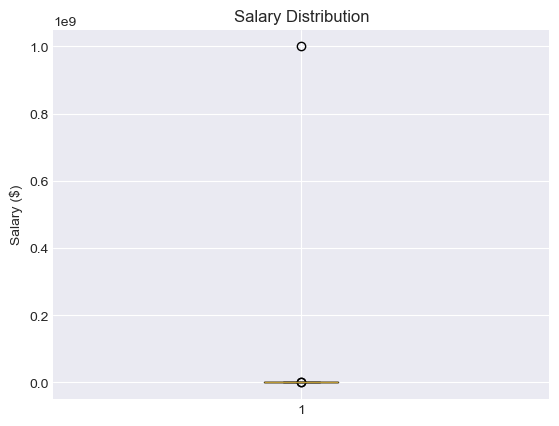

In [87]:
plt.boxplot(df['Salary'].dropna())
plt.title('Salary Distribution')
plt.ylabel('Salary ($)')
plt.show()

**Why does the box look so small?**

The 1 billion outlier forces the Y-axis to go from 0 to 1,000,000,000. Compared to this, the normal salaries (69k-88k) appear compressed near zero.

**The actual values:**
- Bottom of box: 69,250 (Q1)
- Line inside box: 77,000 (median)
- Top of box: 88,500 (Q3)
- Bottom outlier: 10 (impossible - too low)
- Top outlier: 1,000,000,000 (impossible - 1 billion dollars!)

**The problem:**
The extreme outliers make this plot useless. You cannot see the real salary distribution. Most employees earn 69k-88k, but the visualization is destroyed by two impossible values.

We have two clear data errors that make analysis and visualization impossible. Once removed, we'll see the actual salary distribution clearly.

In [90]:
df['Years_Experience'].describe()

count    24.000000
mean      9.166667
std      10.119575
min      -2.000000
25%       4.750000
50%       7.000000
75%      10.000000
max      50.000000
Name: Years_Experience, dtype: float64

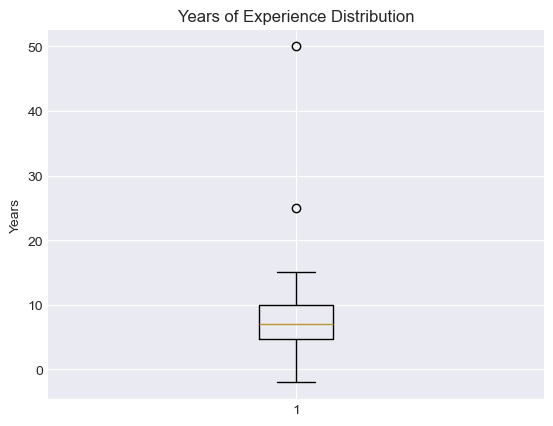

In [91]:
plt.boxplot(df['Years_Experience'].dropna())
plt.title('Years of Experience Distribution')
plt.ylabel('Years')
plt.show()

**The box (Q1 to Q3):**
- Bottom of box: 4.75 years (Q1)
- Line inside box: 7 years (median)
- Top of box: 10 years (Q3)

**The whiskers:**
- Bottom whisker extends to -2 years
- Top whisker extends to ~15 years

**The circles (outliers):**
- 25 years - High but possible
- 50 years - Extremely high, needs verification

**Important: Why isn't -2 shown as an outlier?**
The box plot uses a mathematical rule (IQR method) to detect outliers. According to this formula, -2 falls within the "normal" range, so it's NOT flagged as an outlier.

**But -2 is impossible!** You cannot have negative work experience. This shows that box plots only detect statistical outliers, not logical impossibilities. We still need to remove -2 even though the box plot doesn't mark it as an outlier.

**What this tells us:**
Box plots are helpful but not perfect. We must also use common sense to identify impossible values like negative experience.

### IQR Method for Outlier Detection

**What is IQR?**
IQR = Interquartile Range = Q3 - Q1

- Q1 = 25th percentile (bottom of the box)
- Q3 = 75th percentile (top of the box)
- IQR = The height of the box (middle 50% of data)

**Why use the middle 50%?**
The middle 50% represents the "normal" range where most data falls. By measuring this range, we can determine what's unusually far from typical values.

**The outlier formula:**
- Lower bound = Q1 - 1.5 × IQR
- Upper bound = Q3 + 1.5 × IQR

Anything below the lower bound or above the upper bound is considered an outlier.

In [99]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)#quantile() is a built-in function of Pandas Series and DataFrame used to calculate percentiles / quartiles.
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column}:")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")

    return outliers, lower_bound, upper_bound

In [97]:
age_outliers, age_lower, age_upper = detect_outliers_iqr(df, 'Age')

Age:
Q1: 29.0, Q3: 37.5, IQR: 8.5
Lower bound: 16.25, Upper bound: 50.25
Number of outliers: 2


In [101]:
print(age_outliers[['Employee_ID', 'Age']])

   Employee_ID    Age
2         1003   -5.0
6         1006  150.0


In [110]:
salary_outliers, salary_lower, salary_upper = detect_outliers_iqr(df, 'Salary')
print("\n\n", salary_outliers[['Employee_ID', 'Name', 'Salary']])
#detect_outliers_iqr use to detect outliers

Salary:
Q1: 72000.0, Q3: 88000.0, IQR: 16000.0
Lower bound: 48000.0, Upper bound: 112000.0
Number of outliers: 2


     Employee_ID              Name  Salary
4          1004       Sarah Smith  120000
19         1017  William Anderson      10


### Handle outliers

In [111]:
len(df)

21

In [ ]:
condition = (df['Age'] > 0) & (df['Age'] < 100)
df = df[condition]

In [112]:
condition = (df['Salary'] > 0) & (df['Salary'] < 10000000)

df = df[condition]

In [114]:
condition = df['Years_Experience'] >= 0
df = df[condition]

In [115]:
print(f"Rows after outlier removal: {len(df)}")

Rows after outlier removal: 21


In [116]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]
df = df[(df['Salary'] >= 30000) & (df['Salary'] <= 200000)]
df = df[df['Years_Experience'] <= 40]

print(f"After applying business rules: {len(df)}")

After applying business rules: 17


In [118]:
logical_errors = df[df['Years_Experience'] > (df['Age'] - 18)]
print(f"Logical errors: {len(logical_errors)}")
if len(logical_errors) > 0:
    print(logical_errors[['Employee_ID', 'Name', 'Age', 'Years_Experience']])
    df = df[df['Years_Experience'] <= (df['Age'] - 18)]

Logical errors: 0


In [119]:
today = datetime.now()
future_dates = df[df['Join_Date'] > today]

print(f"Rows with future join dates: {len(future_dates)}")
if len(future_dates) > 0:
    print(future_dates[['Employee_ID', 'Name', 'Join_Date']])


Rows with future join dates: 0


In [120]:
df = df[df['Join_Date'] <= today]
print(f"Final rows: {len(df)}")

Final rows: 17


---

## Final Missing Value Handling

Now that we've cleaned outliers and types, let's handle remaining missing values.

In [122]:
print(df.isnull().sum())

Employee_ID          0
Name                 0
Age                  0
Department           1
Salary               0
Years_Experience     0
Performance_Score    1
City                 0
Join_Date            0
Remote_Work          0
dtype: int64


In [123]:
df_dropped = df.dropna()
print(df_dropped.shape)

(15, 10)


In [124]:
df_dropped = df.dropna(subset=['Salary'])

In [ ]:
# Fill numerical columns with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Years_Experience'] = df['Years_Experience'].fillna(df['Years_Experience'].median())
df['Performance_Score'] = df['Performance_Score'].fillna(df['Performance_Score'].median())
#median -> median value is the value that keep in middle

In [ ]:
# Fill categorical columns with mode
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Remote_Work'] = df['Remote_Work'].fillna(df['Remote_Work'].mode()[0]) #mode -> mode is the value that occurs most frequently in a categorical variable

/var/folders/5c/nlfsq63s4n397z0yn78766v00000gn/T/ipykernel_70885/740559723.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Remote_Work'] = df['Remote_Work'].fillna(df['Remote_Work'].mode()[0])


---

## 1.8 Data Validation & Summary

Verify our cleaned dataset.

In [127]:
df = df.reset_index(drop=True) # Just reset, don't keep old index

In [128]:
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)

Shape: (17, 10)

Data types:
Employee_ID                   int64
Name                         object
Age                         float64
Department                   object
Salary                        Int64
Years_Experience            float64
Performance_Score           float64
City                         object
Join_Date            datetime64[ns]
Remote_Work                    bool
dtype: object


In [ ]:
df.head(10)

,Employee_ID,Name,Age,Department,Salary,Years_Experience,Performance_Score,City,Join_Date,Remote_Work
0,1001,John Doe,28.0,Engineering,75000,3.0,4.0,Dhaka,2020-01-15,True
1,1002,ALICE SMITH,32.0,HR,85000,5.0,5.0,Dhaka,2019-01-15,True
2,1008,Lisa Anderson,26.0,Engineering,70000,4.0,4.0,Dhaka,2020-10-05,False
3,1009,David Lee,35.0,HR,90000,8.0,0.0,Chittagong,2019-06-12,False
4,1010,Maria Garcia,42.0,Engineering,95000,12.0,5.0,Sylhet,2015-11-30,False
5,1012,Patricia Martinez,38.0,Engineering,88000,10.0,4.0,Dhaka,2017-08-22,False
6,1013,Robert Taylor,29.0,HR,72000,5.0,4.0,Dhaka,2020-02-14,True
7,1014,Jennifer Brown,31.0,Engineering,78000,6.0,5.0,Chittagong,2020-03-15,True
8,1016,Linda Davis,27.0,HR,67000,4.0,10.0,Dhaka,2021-07-18,True
9,1018,Barbara Thomas,33.0,HR,82000,7.0,4.0,Dhaka,2019-11-25,True


In [129]:
df.describe()

,Employee_ID,Age,Salary,Years_Experience,Performance_Score,Join_Date
count,17.000000,17.000000,17.0,17.000000,17.000000,17
mean,1015.470588,32.470588,78647.058824,6.705882,4.117647,2019-07-05 09:52:56.470588160
min,1001.000000,26.000000,50000.0,3.000000,0.000000,2015-11-30 00:00:00
25%,1010.000000,29.000000,73000.0,5.000000,4.000000,2019-01-15 00:00:00
50%,1016.000000,32.000000,78000.0,6.000000,4.000000,2019-11-25 00:00:00
75%,1021.000000,35.000000,86000.0,8.000000,5.000000,2020-05-30 00:00:00
max,1027.000000,42.000000,95000.0,12.000000,10.000000,2021-07-18 00:00:00
std,7.851096,4.758120,11028.03913,2.733238,2.147160,NaN


In [130]:
df.to_csv('tech_employee_survey_clean.csv', index=False)

# Part 2: Exploratory Data Analysis (EDA) & Visualization

- Understand the data
- Find patterns and relationships
- Calculate statistics
- Create visualizations
- Answer questions about the data

---

## Load Titanic Dataset

**Historical Context:**
The RMS Titanic sank on April 15, 1912 after hitting an iceberg during its maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, approximately 1,500 died.

**The Dataset:**
This dataset contains information about 891 passengers from the Titanic, including whether they survived or not.

**Columns:**
- **Survived**: 0 = Died, 1 = Survived
- **Pclass**: Passenger class (1 = First, 2 = Second, 3 = Third)
- **Name**: Passenger name
- **Sex**: Gender (male/female)
- **Age**: Age in years
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Ticket price
- **Cabin**: Cabin number
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**Our Goal:**
Use exploratory data analysis to understand which passenger characteristics were associated with higher survival rates.

In [3]:
titanic_data_path = "titanic.csv"

In [4]:
titanic = pd.read_csv(titanic_data_path)

print(f"Dataset loaded! Shape: {titanic.shape}")

Dataset loaded! Shape: (891, 12)


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Quick Data Cleaning

Before analysis, we need to handle missing values.

In [8]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Drop Cabin column (77% missing - too much)
titanic = titanic.drop('Cabin', axis=1)

In [10]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [140]:
print("Missing values after cleaning:")
print(titanic.isnull().sum())

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


---

## Exploratory Data Analysis

Now we'll analyze the Titanic dataset to answer: **What factors determined who survived?**

We'll use:
- Statistics (mean, median, groupby)
- Correlations
- Visualizations (Seaborn, Matplotlib, Plotly)
  
### Overall Survival

First, let's see how many passengers survived overall.

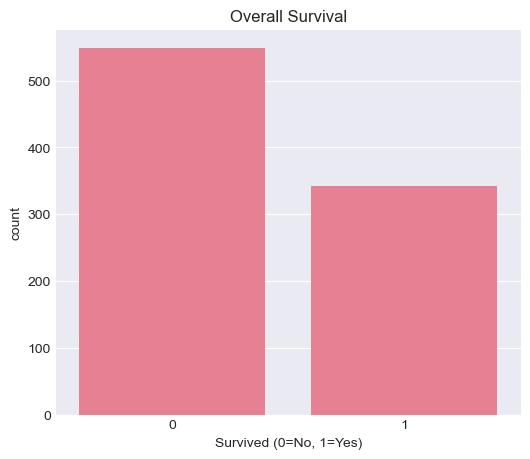

In [141]:
plt.figure(figsize=(6, 5))
sns.countplot(data=titanic, x='Survived')
plt.title('Overall Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

In [ ]:
survival_rate = titanic['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

print(f"\nCounts:")
print(titanic['Survived'].value_counts())

Overall Survival Rate: 38.38%

Counts:
Survived
0    549
1    342
Name: count, dtype: int64


Out of 891 passengers, 342 survived (38.38%).

**Question:** What factors influenced who survived?

### Gender & Survival

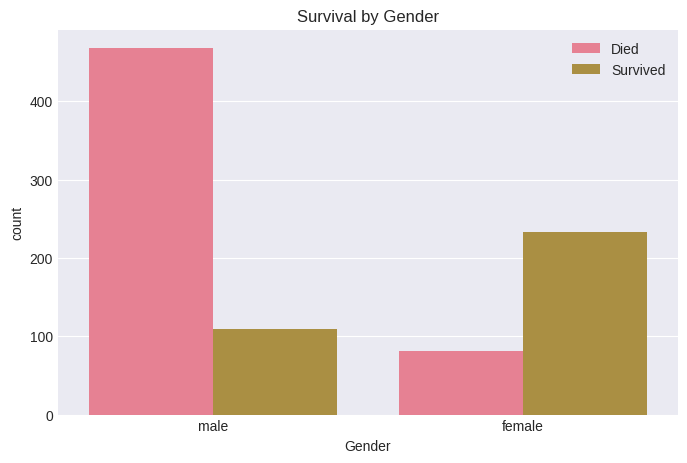

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.legend(['Died', 'Survived'])
plt.show()

In [142]:
print("Survival rate by Gender:")
print(titanic.groupby('Sex')['Survived'].mean() * 100)

Survival rate by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


**Findings:**
- Female: 74% survived
- Male: 19% survived
- Women were almost 4x more likely to survive than men

### Passenger Class & Survival

In [144]:
survival_by_class = titanic.groupby('Pclass')['Survived'].mean() * 100

print("Survival rate by Class:")
print(survival_by_class)

Survival rate by Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


**Findings:**
- 1st class: 63% survived
- 2nd class: 47% survived
- 3rd class: 24% survived
- First class passengers were 2.6x more likely to survive than third class

### Age Distribution & Survival

In [143]:
titanic['Age_Group'] = pd.cut(titanic['Age'],
                               bins=[0, 12, 18, 35, 60, 80],
                               labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

print("Survival rate by Age Group:")
print(titanic.groupby('Age_Group')['Survived'].mean() * 100)

Survival rate by Age Group:
Age_Group
Child         57.971014
Teen          42.857143
Adult         35.327103
Middle Age    40.000000
Senior        22.727273
Name: Survived, dtype: float64


/var/folders/5c/nlfsq63s4n397z0yn78766v00000gn/T/ipykernel_70885/4237121800.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('Age_Group')['Survived'].mean() * 100)


**Findings:**
- Children (0-12): 58% survived
- Teens (13-17): 43% survived
- Adults (18-35): 35% survived
- Middle Age (36-60): 40% survived
- Seniors (60+): 23% survived
- Children had the best survival rate

### Fare & Survival

In [ ]:
print("Average fare by survival status:")
print(titanic.groupby('Survived')['Fare'].mean())

Average fare by survival status:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


**Findings:**
- Survivors paid an average of 48.40
- Non-survivors paid an average of 22.12
- Survivors paid 2.2x higher fares on average

### Embarkation Port Analysis

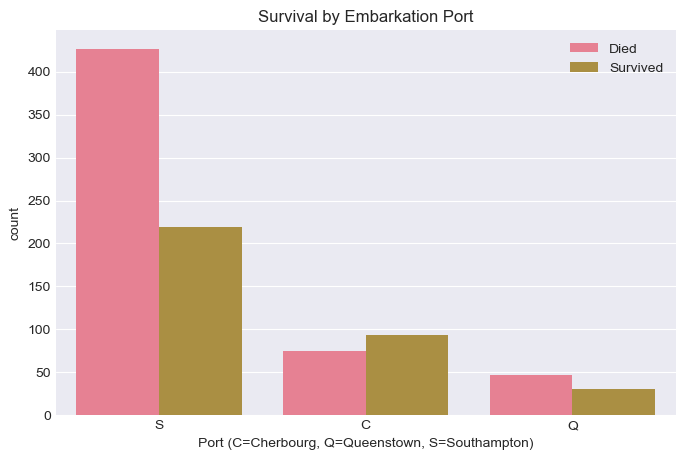

In [145]:
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.legend(['Died', 'Survived'])
plt.show()

In [147]:
print("Survival rate by Embarkation Port:")
print(titanic.groupby('Embarked')['Survived'].mean() * 100)

Survival rate by Embarkation Port:
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


In [148]:
print("Passenger Class distribution by Port (%):")
print(pd.crosstab(titanic['Embarked'], titanic['Pclass'], normalize='index') * 100)

Passenger Class distribution by Port (%):
Pclass            1          2          3
Embarked                                 
C         50.595238  10.119048  39.285714
Q          2.597403   3.896104  93.506494
S         19.969040  25.386997  54.643963


**Findings:**
- Cherbourg: 55% survived
- Queenstown: 39% survived
- Southampton: 34% survived

**Why the difference?**

Cherbourg had 51% first class passengers, while Queenstown had 94% third class passengers. The embarkation port correlates with passenger class, not survival itself.

### Correlation Analysis

- Values range from -1 to +1
- Positive (+): Both increase together
- Negative (-): One increases, other decreases
- Closer to 0 = weaker relationship

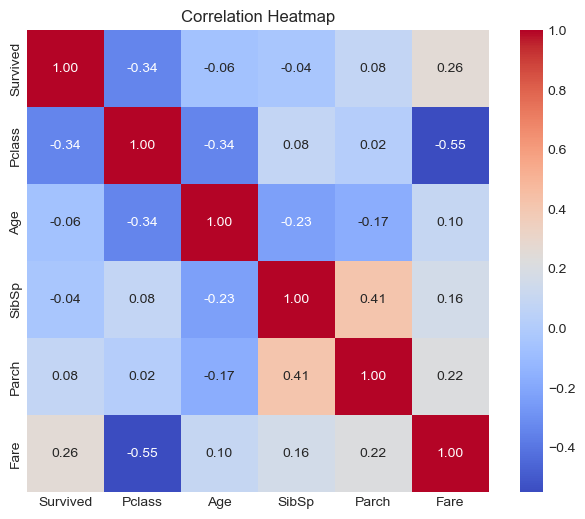

In [151]:
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = titanic[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print("Correlation with Survival:")
print(correlation_matrix['Survived'].sort_values(ascending=False))


Correlation with Survival:
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64


**Pclass: -0.34**
- Negative means: higher class number → lower survival
- Remember: 1st class = 1, 3rd class = 3
- So higher number (poorer class) = worse survival
- This is the strongest correlation we see

**Fare: +0.26**
- Positive means: higher fare → better survival
- Makes sense: expensive tickets = 1st class = better access to lifeboats

**Why are Fare and Pclass both correlated?**
They measure the same thing! 1st class tickets cost more. So:
- Rich passenger → High fare → 1st class → Better survival

**Age, SibSp, Parch: Close to 0**
- Values like -0.06, +0.08, -0.04 are almost zero
- Means: these factors had very little impact on survival
- Having siblings or being older didn't really matter much

**Why doesn't Gender appear here?**
Gender shows the strongest survival impact (74% vs 19%), but correlation matrices only work with numerical data. Gender is categorical (male/female), not a number, so it can't be in this heatmap.


### Combined Analysis: Class & Gender

In [153]:
print("Survival rate by Class and Gender (%):")
combined = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
print(combined)

Survival rate by Class and Gender (%):
Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


**Findings:**
- 1st class females: 96.8% survived
- 3rd class males: 13.5% survived
- The combination of gender and class created the biggest survival gap

### Interactive Visualization with Plotly

In [154]:
import plotly.express as px

survival_data = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_data['Survived'] = survival_data['Survived'] * 100

fig = px.bar(survival_data,
             x='Pclass',
             y='Survived',
             color='Sex',
             title='Survival Rate by Class and Gender (Interactive)',
             labels={'Survived': 'Survival Rate (%)', 'Pclass': 'Passenger Class'},
             barmode='group')
fig.show()

---
## Summary

**Key patterns discovered:**
1. Gender had the largest impact (74% female vs 19% male survival)
2. Passenger class significantly affected survival (63% first class vs 24% third class)
3. The combination of being female and first class gave 97% survival
4. Age, family size, and embarkation port had smaller effects
5. Fare correlated with survival because it reflected passenger class

**The data shows:** Social class and gender were the primary determinants of who survived the Titanic disaster.

---

## Additional Resources

1. **Pandas Documentation:** https://pandas.pydata.org/docs/
2. **Matplotlib Gallery:** https://matplotlib.org/stable/gallery/
3. **Seaborn Tutorial:** https://seaborn.pydata.org/tutorial.html
4. **Kaggle Datasets:** https://www.kaggle.com/datasets

---